In [103]:
# Carregando bibliotecas
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.stats as stats
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.io as pio
import warnings
import csv

In [104]:
import pandas as pd

# Abrindo o arquivo em modo de leitura ('r')
with open('CAGEDEXC202301.txt', 'r') as arquivo:
    # Lendo todo o conteúdo do arquivo e armazenando em uma variável
    conteudo = arquivo.read()

# printando o 'conteudo'
print(conteudo)

competênciamov;região;uf;município;seção;subclasse;saldomovimentação;cbo2002ocupação;categoria;graudeinstrução;idade;horascontratuais;raçacor;sexo;tipoempregador;tipoestabelecimento;tipomovimentação;tipodedeficiência;indtrabintermitente;indtrabparcial;salário;tamestabjan;indicadoraprendiz;origemdainformação;competênciadec;competênciaexc;indicadordeexclusão;indicadordeforadoprazo;unidadesaláriocódigo;valorsaláriofixo
202001;1;17;172100;N;8220200;-1;422305;101;7;23;36,00;3;3;0;1;40;0;0;0;1039,00;10;0;1;202001;202301;1;0;5;1039,00
202001;5;52;521310;A;151201;1;621005;101;7;46;44,00;1;3;2;3;10;0;0;0;1200,00;1;0;1;202001;202301;1;0;5;1200,00
202001;3;33;330600;N;8211300;1;411005;101;7;29;44,00;2;3;0;1;20;0;0;0;1039,00;2;0;1;202001;202301;1;0;5;1039,00
202001;3;35;351907;G;4721102;1;513435;101;7;18;42,00;1;3;0;1;20;0;0;0;2796,92;4;0;1;202001;202301;1;0;4;1398,46
202001;3;33;330600;N;8211300;-1;411005;101;7;29;44,00;2;3;0;1;40;0;0;0;1039,00;2;0;1;202003;202301;1;1;5;1039,00
202001;5;52;520870

In [105]:
import csv

# Transformando o arquivo txt para csv
arquivo_txt = 'CAGEDEXC202301.txt'
arquivo_csv = 'DESEMPREGO2023.csv'

# Abrindo o arquivo de texto em modo de leitura ('r')
with open(arquivo_txt, 'r') as txt_file:
    # Ler as linhas do arquivo
    linhas = txt_file.readlines()

# Processando as linhas e separando os valores
dados_csv = []
for linha in linhas:
    # dividindo a linha por vírgulas
    valores = linha.strip().split(',')  # separando os valores da linha por vírgulas e removendo os espaços em branco
    dados_csv.append(valores)

# Escrevendo os dados no arquivo CSV
with open(arquivo_csv, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(dados_csv)

print(f'O arquivo CSV "{arquivo_csv}" foi criado com sucesso.')

O arquivo CSV "DESEMPREGO2023.csv" foi criado com sucesso.


In [166]:
#carregando os dados do arquivo csv
df = pd.read_csv("DESEMPREGO2023.csv", sep=';')

In [170]:

df['município'] = df['município'].astype(int)

In [172]:
# informação do dataset e tipos de váriaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7900 entries, 0 to 7899
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   competênciamov          7900 non-null   int64  
 1   região                  7900 non-null   int64  
 2   uf                      7900 non-null   int64  
 3   município               7900 non-null   int64  
 4   seção                   7900 non-null   object 
 5   subclasse               7900 non-null   int64  
 6   saldomovimentação       7900 non-null   int64  
 7   cbo2002ocupação         7900 non-null   int64  
 8   categoria               7900 non-null   int64  
 9   graudeinstrução         7900 non-null   int64  
 10  idade                   7896 non-null   float64
 11  horascontratuais        7900 non-null   object 
 12  raçacor                 7900 non-null   int64  
 13  sexo                    7900 non-null   int64  
 14  tipoempregador          7900 non-null   

In [168]:
# Carregando as 5 primeiras linhas do Dataframe
df.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,competênciaexc,indicadordeexclusão,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo
0,202001,1,17,172100,N,8220200,-1,422305,101,7,...,"1039,00",10,0,1,202001,202301,1,0,5,"1039,00"
1,202001,5,52,521310,A,151201,1,621005,101,7,...,"1200,00",1,0,1,202001,202301,1,0,5,"1200,00"
2,202001,3,33,330600,N,8211300,1,411005,101,7,...,"1039,00",2,0,1,202001,202301,1,0,5,"1039,00"
3,202001,3,35,351907,G,4721102,1,513435,101,7,...,"2796,92",4,0,1,202001,202301,1,0,4,"1398,46"
4,202001,3,33,330600,N,8211300,-1,411005,101,7,...,"1039,00",2,0,1,202003,202301,1,1,5,"1039,00"


In [109]:
# Mostranndo valores estatísticos do Dataframe como média, desvio padrão, mínimos e máximos, quartis
df.describe()

,competênciamov,região,uf,município,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,idade,...,indtrabintermitente,indtrabparcial,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,competênciaexc,indicadordeexclusão,indicadordeforadoprazo,unidadesaláriocódigo
count,7900.000000,7900.000000,7900.000000,7900.000000,7.900000e+03,7900.000000,7900.000000,7900.000000,7900.000000,7896.000000,...,7900.000000,7900.000000,7900.000000,7900.000000,7900.0,7900.000000,7900.0,7900.0,7900.000000,7900.000000
mean,202178.460886,3.014557,34.014430,342275.001646,5.965164e+06,-0.012658,497639.466709,101.392911,7.644430,34.034701,...,0.016203,0.375823,4.109114,0.008228,1.0,202188.112025,202301.0,1.0,0.270506,6.766582
std,53.447665,1.013476,9.446073,94835.338522,2.397973e+06,0.999983,193971.163663,1.566939,7.029284,11.263939,...,0.126262,1.677551,2.910792,0.090339,0.0,47.312260,0.0,0.0,0.444250,14.419078
min,202001.000000,1.000000,11.000000,110002.000000,1.113020e+05,-1.000000,10105.000000,101.000000,1.000000,14.000000,...,0.000000,0.000000,1.000000,0.000000,1.0,202001.000000,202301.0,1.0,0.000000,1.000000
25%,202112.000000,3.000000,31.000000,310620.000000,4.520001e+06,-1.000000,331205.000000,101.000000,7.000000,25.000000,...,0.000000,0.000000,2.000000,0.000000,1.0,202203.000000,202301.0,1.0,0.000000,5.000000
50%,202206.000000,3.000000,35.000000,351923.500000,5.611203e+06,-1.000000,513435.000000,101.000000,7.000000,32.000000,...,0.000000,0.000000,3.000000,0.000000,1.0,202208.000000,202301.0,1.0,0.000000,5.000000
75%,202211.000000,3.000000,35.000000,355410.000000,8.411600e+06,1.000000,715210.000000,101.000000,7.000000,41.000000,...,0.000000,0.000000,6.000000,0.000000,1.0,202211.000000,202301.0,1.0,1.000000,5.000000
max,202212.000000,9.000000,99.000000,999999.000000,9.700500e+06,1.000000,999999.000000,111.000000,80.000000,95.000000,...,1.000000,9.000000,10.000000,1.000000,1.0,202212.000000,202301.0,1.0,1.000000,99.000000


In [110]:
# Numero de linhas e colunas
df.shape

print(f"Temos  {df.shape[0]} linhas e {df.shape[1]} colunas.")

Temos  7900 linhas e 30 colunas.


In [111]:
print(df['uf'])

0       17
1       52
2       33
3       35
4       33
        ..
7895    26
7896    35
7897    35
7898    33
7899    41
Name: uf, Length: 7900, dtype: int64


In [112]:
df.replace({'uf': {11: 'Rondônia',
                   12: 'Acre',
                   13: 'Amazonas',
                   14: 'Roraima',
                   15: 'Pará',
                   16: 'Amapá',
                   17: 'Tocantins',
                   21: 'Maranhão',
                   22: 'Piauí',
                   23: 'Ceará',
                   24: 'Rio Grande do Norte',
                   25: 'Paraíba',
                   26: 'Pernambuco',
                   27: 'Alagoas',
                   28: 'Sergipe',
                   29: 'Bahia',
                   31: 'Minas Gerais',
                   32: 'Espírito Santo',
                   33: 'Rio de Janeiro',
                   35: 'São Paulo',
                   41: 'Paraná',
                   42: 'Santa Catarina',
                   43: 'Rio Grande do Sul',
                   50: 'Mato Grosso do Sul',
                   51: 'Mato Grosso',
                   52: 'Goiás',
                   53: 'Distrito Federal',
                   99: 'Não identificado'}}, inplace=True)

In [113]:
df.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,competênciaexc,indicadordeexclusão,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo
0,202001,1,Tocantins,172100,N,8220200,-1,422305,101,7,...,"1039,00",10,0,1,202001,202301,1,0,5,"1039,00"
1,202001,5,Goiás,521310,A,151201,1,621005,101,7,...,"1200,00",1,0,1,202001,202301,1,0,5,"1200,00"
2,202001,3,Rio de Janeiro,330600,N,8211300,1,411005,101,7,...,"1039,00",2,0,1,202001,202301,1,0,5,"1039,00"
3,202001,3,São Paulo,351907,G,4721102,1,513435,101,7,...,"2796,92",4,0,1,202001,202301,1,0,4,"1398,46"
4,202001,3,Rio de Janeiro,330600,N,8211300,-1,411005,101,7,...,"1039,00",2,0,1,202003,202301,1,1,5,"1039,00"


In [114]:
df.tail()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,competênciaexc,indicadordeexclusão,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo
7895,202212,2,Pernambuco,261070,S,9529105,-1,782115,101,7,...,"1500,00",6,0,1,202212,202301,1,0,5,"1500,00"
7896,202212,3,São Paulo,354890,Q,8711502,-1,411005,101,7,...,"719,50",3,0,1,202212,202301,1,0,5,"719,50"
7897,202212,3,São Paulo,355030,N,7820500,1,514310,106,7,...,"1634,00",7,0,1,202212,202301,1,0,5,"1634,00"
7898,202212,3,Rio de Janeiro,330475,H,4924800,-1,782510,101,7,...,"1650,00",1,0,1,202212,202301,1,0,5,"1650,00"
7899,202212,4,Paraná,412625,C,2930101,1,724315,101,6,...,"1579,99",10,0,1,202212,202301,1,0,5,"1579,99"


In [115]:
df.dtypes

competênciamov              int64
região                      int64
uf                         object
município                   int64
seção                      object
subclasse                   int64
saldomovimentação           int64
cbo2002ocupação             int64
categoria                   int64
graudeinstrução             int64
idade                     float64
horascontratuais           object
raçacor                     int64
sexo                        int64
tipoempregador              int64
tipoestabelecimento         int64
tipomovimentação            int64
tipodedeficiência           int64
indtrabintermitente         int64
indtrabparcial              int64
salário                    object
tamestabjan                 int64
indicadoraprendiz           int64
origemdainformação          int64
competênciadec              int64
competênciaexc              int64
indicadordeexclusão         int64
indicadordeforadoprazo      int64
unidadesaláriocódigo        int64
valorsaláriofi

In [116]:
df.replace({'região': {1: 'Norte', 2: 'Nordeste', 3: 'Sudeste', 4: 'Sul', 5: 'Centro-Oeste', 9: 'Não identificado'}}, inplace=True)

In [117]:
df.replace({'município': {431440: 'Pelotas', 431560: 'Rio Grande', 431850: 'São José do Norte',  999999: 'Não identificado'}}, inplace=True)

In [118]:
df.replace({'graudeinstrução': {1: 'Analfabeto',
                                2: 'Até o 5º Incompleto',
                                3: '5º Completo Fundamental',
                                4: '6º a 9º Fundamental',
                                5: 'Fundamental Completo',
                                6: 'Médio Incompleto',
                                7: 'Médio Completo',
                                8: 'Superior Incompleto',
                                9: 'Superior Completo',
                                10: 'Mestrado',
                                11: 'Doutorado',
                                80: 'Pós-Graduação completa',
                                99: 'Não identificado'}}, inplace=True)

In [119]:
df.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,competênciaexc,indicadordeexclusão,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo
0,202001,Norte,Tocantins,172100,N,8220200,-1,422305,101,Médio Completo,...,"1039,00",10,0,1,202001,202301,1,0,5,"1039,00"
1,202001,Centro-Oeste,Goiás,521310,A,151201,1,621005,101,Médio Completo,...,"1200,00",1,0,1,202001,202301,1,0,5,"1200,00"
2,202001,Sudeste,Rio de Janeiro,330600,N,8211300,1,411005,101,Médio Completo,...,"1039,00",2,0,1,202001,202301,1,0,5,"1039,00"
3,202001,Sudeste,São Paulo,351907,G,4721102,1,513435,101,Médio Completo,...,"2796,92",4,0,1,202001,202301,1,0,4,"1398,46"
4,202001,Sudeste,Rio de Janeiro,330600,N,8211300,-1,411005,101,Médio Completo,...,"1039,00",2,0,1,202003,202301,1,1,5,"1039,00"


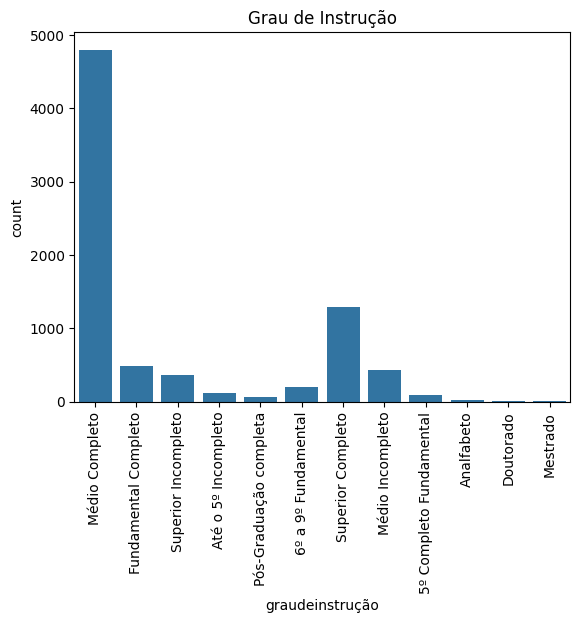

In [120]:
# plotando o gráfico Grau de Instrução

import matplotlib.pyplot as plt
sns.countplot(x = 'graudeinstrução', data = df)
plt.xticks(rotation=90)
plt.title('Grau de Instrução')
plt.show()


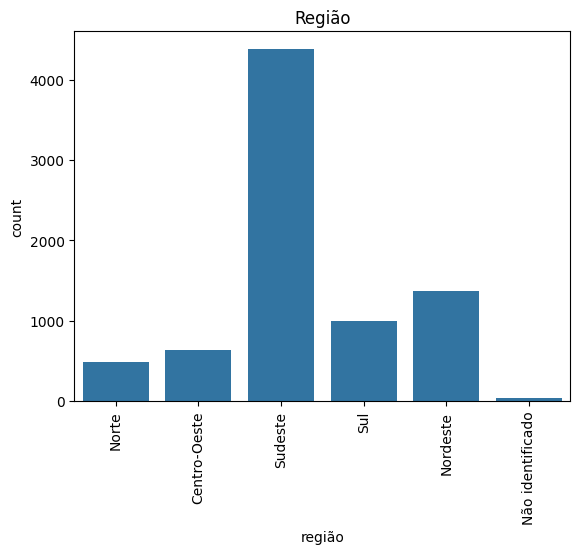

In [121]:
# Plotando o gráfico das regiões

import matplotlib.pyplot as plt
sns.countplot(x = 'região', data = df)
plt.xticks(rotation=90)
plt.title('Região')
plt.show()


In [122]:
# convertendo os valores numericos para strings
df.replace({'raçacor': { 1: 'Branca',
                         2: 'Preta',
                         3: 'Parda',
                         4: 'Amarela',
                         5: 'Indígena',
                         6: 'Não informada',
                         9: 'Não identificado'}}, inplace=True)

In [123]:
#convertendo os valores numericos para strings
df.replace({'sexo': { 1: 'Homem',
                      3: 'Mulher',
                      9: 'Não identificado'}}, inplace=True)

In [124]:
df.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,competênciaexc,indicadordeexclusão,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo
0,202001,Norte,Tocantins,172100,N,8220200,-1,422305,101,Médio Completo,...,"1039,00",10,0,1,202001,202301,1,0,5,"1039,00"
1,202001,Centro-Oeste,Goiás,521310,A,151201,1,621005,101,Médio Completo,...,"1200,00",1,0,1,202001,202301,1,0,5,"1200,00"
2,202001,Sudeste,Rio de Janeiro,330600,N,8211300,1,411005,101,Médio Completo,...,"1039,00",2,0,1,202001,202301,1,0,5,"1039,00"
3,202001,Sudeste,São Paulo,351907,G,4721102,1,513435,101,Médio Completo,...,"2796,92",4,0,1,202001,202301,1,0,4,"1398,46"
4,202001,Sudeste,Rio de Janeiro,330600,N,8211300,-1,411005,101,Médio Completo,...,"1039,00",2,0,1,202003,202301,1,1,5,"1039,00"


In [174]:
#carregando os dados do arquivo xlsx
df_ibge = pd.read_excel("RELATORIO_DTB_BRASIL_MUNICIPIO.xls", header=6, usecols=['codigo','Nome_Município'])

In [194]:
df_ibge.head(10)

,codigo,Nome_Município
0,1100015,Alta Floresta D'Oeste
1,1100379,Alto Alegre dos Parecis
2,1100403,Alto Paraíso
3,1100346,Alvorada D'Oeste
4,1100023,Ariquemes
5,1100452,Buritis
6,1100031,Cabixi
7,1100601,Cacaulândia
8,1100049,Cacoal
9,1100700,Campo Novo de Rondônia


In [193]:
print(df_ibge.head(10))

    codigo           Nome_Município
0  1100015    Alta Floresta D'Oeste
1  1100379  Alto Alegre dos Parecis
2  1100403             Alto Paraíso
3  1100346         Alvorada D'Oeste
4  1100023                Ariquemes
5  1100452                  Buritis
6  1100031                   Cabixi
7  1100601              Cacaulândia
8  1100049                   Cacoal
9  1100700   Campo Novo de Rondônia


In [187]:
df_merge = df.merge(df_ibge, left_on='município', right_on='codigo', how='left')

In [191]:
df_merge.dtypes

competênciamov              int64
região                      int64
uf                          int64
município                   int64
seção                      object
subclasse                   int64
saldomovimentação           int64
cbo2002ocupação             int64
categoria                   int64
graudeinstrução             int64
idade                     float64
horascontratuais           object
raçacor                     int64
sexo                        int64
tipoempregador              int64
tipoestabelecimento         int64
tipomovimentação            int64
tipodedeficiência           int64
indtrabintermitente         int64
indtrabparcial              int64
salário                    object
tamestabjan                 int64
indicadoraprendiz           int64
origemdainformação          int64
competênciadec              int64
competênciaexc              int64
indicadordeexclusão         int64
indicadordeforadoprazo      int64
unidadesaláriocódigo        int64
valorsaláriofi

In [190]:
df_ibge.dtypes

codigo             int64
Nome_Município    object
dtype: object

In [192]:
df_ibge.head()

,codigo,Nome_Município
0,1100015,Alta Floresta D'Oeste
1,1100379,Alto Alegre dos Parecis
2,1100403,Alto Paraíso
3,1100346,Alvorada D'Oeste
4,1100023,Ariquemes


In [180]:
df_merge.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indicadoraprendiz,origemdainformação,competênciadec,competênciaexc,indicadordeexclusão,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,codigo,Nome_Município
0,202001,1,17,172100,N,8220200,-1,422305,101,7,...,0,1,202001,202301,1,0,5,"1039,00",NaN,NaN
1,202001,5,52,521310,A,151201,1,621005,101,7,...,0,1,202001,202301,1,0,5,"1200,00",NaN,NaN
2,202001,3,33,330600,N,8211300,1,411005,101,7,...,0,1,202001,202301,1,0,5,"1039,00",NaN,NaN
3,202001,3,35,351907,G,4721102,1,513435,101,7,...,0,1,202001,202301,1,0,4,"1398,46",NaN,NaN
4,202001,3,33,330600,N,8211300,-1,411005,101,7,...,0,1,202003,202301,1,1,5,"1039,00",NaN,NaN


In [183]:
df.dtypes

competênciamov              int64
região                      int64
uf                          int64
município                   int64
seção                      object
subclasse                   int64
saldomovimentação           int64
cbo2002ocupação             int64
categoria                   int64
graudeinstrução             int64
idade                     float64
horascontratuais           object
raçacor                     int64
sexo                        int64
tipoempregador              int64
tipoestabelecimento         int64
tipomovimentação            int64
tipodedeficiência           int64
indtrabintermitente         int64
indtrabparcial              int64
salário                    object
tamestabjan                 int64
indicadoraprendiz           int64
origemdainformação          int64
competênciadec              int64
competênciaexc              int64
indicadordeexclusão         int64
indicadordeforadoprazo      int64
unidadesaláriocódigo        int64
valorsaláriofi

In [ ]:
import pandas as pd

# Carregar a tabela de códigos e nomes de municípios do IBGE
df_ibge = pd.read_excel("RELATORIO_DTB_BRASIL_MUNICIPIO.xls", header=6)

# Suponha que você tenha um DataFrame chamado df_excel com uma coluna 'codigo_cidade'
# que contém os códigos numéricos das cidades
# e você queira converter esses códigos em nomes de cidades
df['Nome_Município'] = df['município'].map(df_ibge.set_index('codigo)['nome'])

# Exibir as primeiras linhas do DataFrame resultante
print(df.head())